In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
stock = 'fb'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25

In [11]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [12]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [13]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [14]:
df = data["Close"].pct_change() * 100

In [15]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [16]:
df1 = pd.merge(data,df, on="Date")
#df1

In [17]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [18]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [19]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [20]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [21]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [22]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [23]:
df1.dropna(inplace= True)

In [24]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [25]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [26]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [27]:
#crossovers = pd.DataFrame()
#crossovers['Dates'] = Short_MV_Avg_Span['Date']
#crossovers['Price'] = [i for i in df1.Close]
#crossovers['Short_MV_Avg_Span'] = Short_MV_Avg_Span['Close']
#crossovers['Long_MV_Avg_Span'] = Long_MV_Avg_Span['Close']
#crossovers

In [28]:
df1.dropna(inplace= True)
df1.tail(20)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
2377,1.0,2021-10-28,312.989990,325.519989,308.109985,316.920013,316.920013,69.515344,-54.348859,1.505353,...,0.022254,3.930023,-1.970001,17.410004,7.190002,1,330.756889,341.600257,-10.843368,-10.394212
2378,1.0,2021-10-29,320.190002,326.000000,319.600006,323.570007,323.570007,-27.058189,69.515344,2.098319,...,0.506033,3.380005,3.930023,6.399994,17.410004,1,330.072424,340.893188,-10.820764,-10.843368
2379,1.0,2021-11-01,326.040009,333.450012,326.000000,329.980011,329.980011,-14.950323,-27.058189,1.981025,...,0.620313,3.940002,3.380005,7.450012,6.399994,1,330.063623,340.465220,-10.401598,-10.820764
2380,1.0,2021-11-02,331.380005,334.790009,323.799988,328.079987,328.079987,-10.044450,-14.950323,-0.575800,...,0.534229,-3.300018,3.940002,10.990021,7.450012,0,329.874705,339.979525,-10.104820,-10.401598
2381,1.0,2021-11-03,327.489990,332.149994,323.200012,331.619995,331.619995,-26.686770,-10.044450,1.079008,...,0.389444,4.130005,-3.300018,8.949982,10.990021,1,330.040923,339.651700,-9.610777,-10.104820
2382,1.0,2021-11-04,334.010010,337.269989,332.649994,335.850006,335.850006,8.220720,-26.686770,1.275560,...,0.940782,1.839996,4.130005,4.619995,8.949982,1,330.594169,339.502614,-8.908445,-9.610777
2383,1.0,2021-11-05,340.309998,346.790009,339.640015,341.130005,341.130005,19.367601,8.220720,1.572130,...,0.692644,0.820007,1.839996,7.149994,4.619995,1,331.597582,339.566433,-7.968851,-8.908445
2384,1.0,2021-11-08,344.420013,344.790009,338.339996,338.619995,338.619995,-31.690631,19.367601,-0.735793,...,0.208390,-5.800018,0.820007,6.450012,7.149994,0,332.266383,339.529318,-7.262935,-7.968851
2385,1.0,2021-11-09,340.000000,341.309998,334.470001,335.369995,335.369995,-4.284040,-31.690631,-0.959778,...,0.043411,-4.630005,-5.800018,6.839996,6.450012,0,332.561965,339.366207,-6.804242,-7.262935
2386,1.0,2021-11-10,332.489990,333.190002,325.510010,327.640015,327.640015,24.582638,-4.284040,-2.304911,...,0.131578,-4.849976,-4.630005,7.679993,6.839996,0,332.093208,338.906357,-6.813149,-6.804242


In [29]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.show(close=None, block=None)>

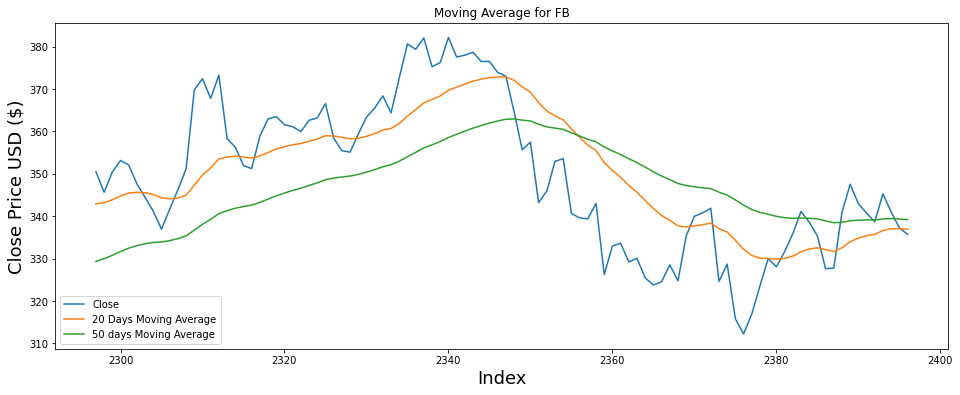

In [30]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
plt.title("Moving Average for " + stock.upper())
plt.show

In [31]:
y = df1["Up_Down"].values

In [32]:
model = sm.Logit(y,X)

In [33]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.689933
         Iterations 4


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2394
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Nov 2021   Pseudo R-squ.:                0.002706
Time:                        07:16:42   Log-Likelihood:                -1651.7
converged:                       True   LL-Null:                       -1656.2
Covariance Type:            nonrobust   LLR p-value:                    0.1106
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3324      0.113      2.943      0.003       0.111       0.554
Trend_Lag                                 -0.4161      0.182     -2.292      0.022      -0.772      -0.060
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0085      0.009     -0.966      0.334      -0.026       0.009
Close-Open_Lag                             0.0067      0.022      0.309      0.757      -0.036       0.049
High-Low_Lag                               0.0009      0.015      0.062      0.950      -0.028       0.030
Volume_Lag                             -1.483e-05      0.001     -0.017      0.986      -0.002       0.002
==========================================================================================================
"""

In [35]:
prediction = result.predict(X)

In [36]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [37]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [38]:
y = df1["Up_Down"].values

In [39]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [40]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,313,822
Up,304,955


In [41]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.529657477025898


In [42]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6066985645933014


In [43]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [44]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [45]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [46]:
#df1.tail(10)

In [47]:
print("\nIf ${:,.2f} was invested in [ {} ], and Just Hold and Not Trade for {:,} years, the ROI = ${:,.2f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100.00 was invested in [ FB ], and Just Hold and Not Trade for 10 years, the ROI = $799.05


In [48]:
print ("\nIf ${:,.2f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.2f}".format(invest, diff_years, (money + (share * df1.iloc[-1,5]))))


If $100.00 was invested 10 years ago, buy and sell according this script's recommandation, the ROI = $961.15


In [49]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
2382 2021-11-04                       Up                Up
2383 2021-11-05                       Up                Up
2384 2021-11-08                     Down                Up
2385 2021-11-09                     Down                Up
2386 2021-11-10                     Down                Up
2387 2021-11-11                       Up                Up
2388 2021-11-12                       Up                Up
2389 2021-11-15                       Up                Up
2390 2021-11-16                     Down                Up
2391 2021-11-17                     Down                Up
2392 2021-11-18                     Down                Up
2393 2021-11-19                       Up                Up
2394 2021-11-22                     Down                Up
2395 2021-11-23                     Down                Up
2396 2021-11-24                     Down                Up


In [50]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [51]:
#print(df1.iloc[len(df1)-1,[1,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
#df1.info()

In [52]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ FB ] actually went down, --- base on yesterday's data, We Predication [ FB ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [53]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [54]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.689797
         Iterations 4


In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 2167
Model:                          Logit   Df Residuals:                     2161
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Nov 2021   Pseudo R-squ.:                0.002663
Time:                        07:16:43   Log-Likelihood:                -1494.8
converged:                       True   LL-Null:                       -1498.8
Covariance Type:            nonrobust   LLR p-value:                    0.1573
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2937      0.118      2.486      0.013       0.062       0.525
Trend_Lag                                 -0.4027      0.191     -2.108      0.035      -0.777      -0.028
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0031      0.010     -0.303      0.762      -0.023       0.017
Close-Open_Lag                             0.0040      0.026      0.151      0.880      -0.047       0.055
High-Low_Lag                               0.0116      0.018      0.647      0.518      -0.023       0.047
Volume_Lag                                -0.0004      0.001     -0.450      0.653      -0.002       0.001
==========================================================================================================
"""

In [56]:
#print(result.summary().as_csv())

In [57]:
#summary_list=result.summary().as_csv().split(",")

In [58]:
#print(summary_list)

In [59]:
#print(summary_list[37:39])

In [60]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,11,100
Up,7,109


In [61]:
z = confusion_matrix(y_test,prediction)

In [62]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5286 <=========



In [63]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 19], df1.iloc[-1, 12], df1.iloc[-1, 14], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5151,   [ FB ] will go up! <=========


In [64]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> -3.4063....-2.7358....-2.3832....-2.2783....-2.2644....<=============

 ============> No Trading Waring at this time! <=============


In [65]:
#df1.to_csv('fb.csv', index = False)